In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.4)
# DataThief

# Radius in arcsec
bulgesbp_arcsec = np.loadtxt("../data/NGC5005-bulge_arcsec.txt")
rarcsec, bulge_arcsec, Yerr_arcsec1, Yerr_arcsec2 = bulgesbp_arcsec.T

# Radius in kpc
bulgesbp_kpc = np.loadtxt("../data/NGC5005-bulge_kpc.txt")
rkpc, bulge_kpc, Yerr_kpc1, Yerr_kpc2 = bulgesbp_kpc.T

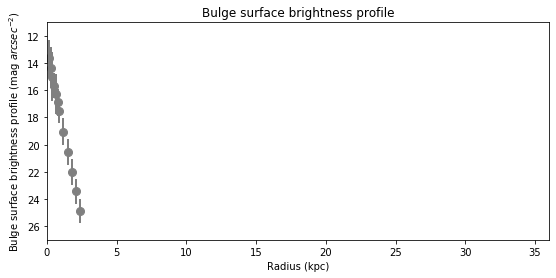

In [3]:
# Plot Bulge surface brightness profile in kpc
plt.figure(figsize=(9,4))
#plt.scatter(rkpc,bulge_kpc)
plt.errorbar(rkpc,bulge_kpc,yerr=[Yerr_kpc1,Yerr_kpc2], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (kpc)")
plt.ylabel("Bulge surface brightness profile (mag $arcsec^{-2}$)")
plt.xlim(0,36)
plt.ylim(27,11)
plt.show()

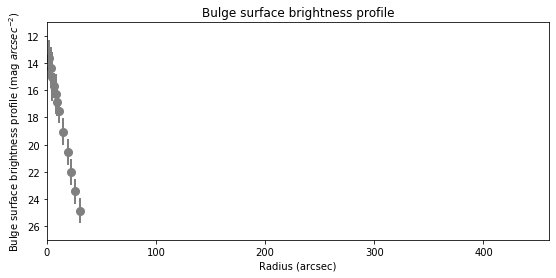

In [4]:
# Plot Bulge surface brightness profile in arcsec
plt.figure(figsize=(9,4))
plt.scatter(rarcsec,bulge_arcsec)
plt.errorbar(rarcsec,bulge_arcsec,yerr=[Yerr_arcsec1,Yerr_arcsec2], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (arcsec)")
plt.ylabel("Bulge surface brightness profile (mag $arcsec^{-2}$)")
plt.xlim(0,460)
plt.ylim(27,11)
plt.show()

In [5]:
# Convert Mag/arcsec**2 to MSun/pc**2

distance = 16.5                             # Distance in megaparsec (from https://academic.oup.com/mnras/article/449/4/3981/1195237#920592944)
bulge_MSun_arcsec = 10**(-0.4*bulge_kpc)
bulge_MSun_pc = (4.8481e-6 * distance)**(-2) * bulge_MSun_arcsec
#print(bulge_kpc)
#print(bulge_MSun_arcsec[0])
print(bulge_MSun_pc)

[5.37290266e+02 2.82623957e+02 1.51080695e+02 8.61249481e+01
 4.75432617e+01 2.79852360e+01 1.54485945e+01 3.75983662e+00
 9.75908213e-01 2.45227388e-01 6.57187014e-02 1.73320117e-02]


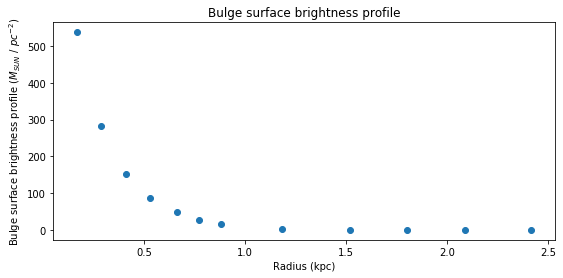

In [7]:
# Plot Bulge surface brightness profile in MSun/pc**2
plt.figure(figsize=(9,4))
plt.scatter(rkpc,bulge_MSun_pc)
#plt.scatter(rkpc,bulge_MSun_arcsec)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (kpc)")
plt.ylabel("Bulge surface brightness profile ($M_{SUN}$ / $pc^{-2}$)")
#plt.ylim(0,1e-9)
plt.show()

In [ ]:
# Radius in kpc
np.savetxt("../data/bulge_msun_pc.txt", 
           np.transpose([rkpc, bulge_MSun_pc]), 
           delimiter='\t', 
           fmt='%10.5f',
           header='Datathief \n Bulge Surface Brightness from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.4) \n MAG/ARCSEC**2 converted to MSUN/PC**2 in python \n units: x-axis: kpc, y-axis: Bulge (Msun pc^-2)')